In [44]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import talib as tb
from bcb import sgs

In [45]:
df = yf.download("WEGE3.SA", period="18y")
cdi = sgs.get({'CDI':12}, start='2005-01-01')

[*********************100%***********************]  1 of 1 completed


In [46]:
# import quandl

# # Defina sua chave de API do Quandl
# quandl.ApiConfig.api_key = 'tY-sLkRbjTXxRk8b7Qcx'

# # Código do CDI no Quandl
# cdi_code = 'BCB/4390'  # Este é o código para os dados do CDI no Quandl

# # Baixe os dados do CDI
# cdi_data = quandl.get(cdi_code)


In [47]:
# cdi_data = cdi_data[cdi_data.index >= "2005-08-08"]

In [48]:
# df = df[df.index >= "2005-08-31"]

In [49]:
df["cdi"] = cdi/100

In [50]:
df

,Open,High,Low,Close,Adj Close,Volume,cdi
Date,,,,,,,
2005-08-22,1.109467,1.109467,1.109467,1.109467,0.804701,0,0.000712
2005-08-23,1.109467,1.109467,1.109467,1.109467,0.804701,0,0.000712
2005-08-24,1.109467,1.109467,1.109467,1.109467,0.804701,0,0.000713
2005-08-25,1.109467,1.109467,1.109467,1.109467,0.804701,0,0.000713
2005-08-26,1.109467,1.109467,1.109467,1.109467,0.804701,0,0.000712
...,...,...,...,...,...,...,...
2023-08-16,39.320000,39.320000,37.439999,37.610001,37.610001,12275400,0.000490
2023-08-17,37.990002,37.990002,36.520000,36.910000,36.910000,8420400,0.000490
2023-08-18,36.740002,36.740002,35.900002,36.259998,36.259998,10409500,0.000490


In [51]:
# df = df.join(cdi_data)

In [52]:
# df["Value"] = df["Value"].fillna(0)

In [53]:
df

,Open,High,Low,Close,Adj Close,Volume,cdi
Date,,,,,,,
2005-08-22,1.109467,1.109467,1.109467,1.109467,0.804701,0,0.000712
2005-08-23,1.109467,1.109467,1.109467,1.109467,0.804701,0,0.000712
2005-08-24,1.109467,1.109467,1.109467,1.109467,0.804701,0,0.000713
2005-08-25,1.109467,1.109467,1.109467,1.109467,0.804701,0,0.000713
2005-08-26,1.109467,1.109467,1.109467,1.109467,0.804701,0,0.000712
...,...,...,...,...,...,...,...
2023-08-16,39.320000,39.320000,37.439999,37.610001,37.610001,12275400,0.000490
2023-08-17,37.990002,37.990002,36.520000,36.910000,36.910000,8420400,0.000490
2023-08-18,36.740002,36.740002,35.900002,36.259998,36.259998,10409500,0.000490


In [54]:
# print (tb.get_function_groups())

In [55]:
ema20 = tb.EMA(df["Adj Close"], timeperiod=20)
ema50 = tb.EMA(df["Adj Close"], timeperiod=50)


In [56]:
df["ema20"] = ema20
df["ema50"] = ema50

In [57]:
fast, slow, histogram = tb.MACD(df['Adj Close'], fastperiod=12, slowperiod=26, signalperiod=9)

In [58]:
df["fastsignal"] = fast
df["slowsignal"] = slow
df["hist"] = histogram


In [59]:
df = df.dropna()

In [60]:
number_of_orders = 0
sinal_macd = list([])
for i in range(len(df)):
    if (df["fastsignal"].iloc[i-1] <= df["slowsignal"].iloc[i])&(df["fastsignal"].iloc[i] > df["slowsignal"].iloc[i])&(number_of_orders == 0):
        sinal_macd.append(1)
        number_of_orders = 1
        print(1)
    elif (df["fastsignal"].iloc[i-1] >= df["slowsignal"].iloc[i])&(df["fastsignal"].iloc[i] < df["slowsignal"].iloc[i])&(number_of_orders == 1):
        sinal_macd.append(2)
        number_of_orders = 0
        print(2)
    else:
        sinal_macd.append(0)  
        print(0)  

sinal_macd = pd.DataFrame(sinal_macd)
sinal_macd.value_counts()


0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
1
0
0
0
0
0
0
0
0
0
0
0
0
2
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
1
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
2
0
0
1
0
0
0
0
0
0
0
0
0
0
0
2
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
1
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
2
1
2
1
0
0
0
2
0
0
0
0
0
0
0
0
0
0
0
0
0
1
0
0
0
0
0
0
0
0
0
0
2
0
0
0
0
0
0
0
0
0
0
0
0
0
1
0
0
0
0
0
0
0
0
0
0
0
0
2
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
1
0
0
0
0
0
0
2
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
1
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
2
0
0
0
0
0
0
0
0
0
0
0
0
0
0
1
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
2
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
1
0
0
0
0
0
0
2
0
1
2
1
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0


0    4064
1     173
2     173
dtype: int64

In [61]:
df["macdsignal"] = sinal_macd.values

C:\Users\User\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [62]:
df["macdsignal"].value_counts()

0    4064
1     173
2     173
Name: macdsignal, dtype: int64

In [63]:
df["data"] = df.index

C:\Users\User\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


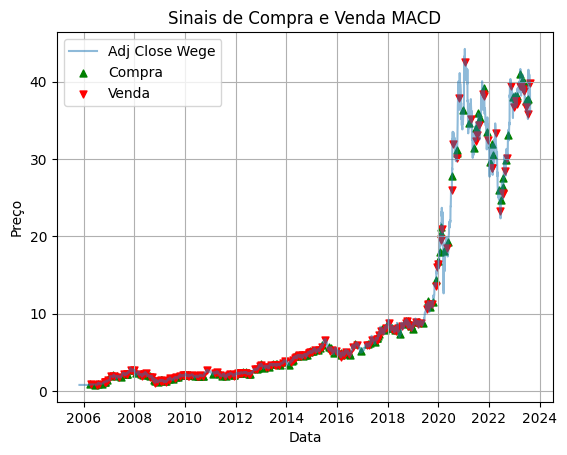

In [64]:
# plt.figure(figsize=(10, 6))
plt.plot(df["data"], df['Adj Close'], label='Adj Close Wege', alpha=0.5)

# Adicionar pontos de compra e venda ao gráfico
compra_indices = df[df['macdsignal'] == 1].index
venda_indices = df[df['macdsignal'] == 2].index

plt.scatter(df["data"].loc[compra_indices], df['Adj Close'].loc[compra_indices], color='green', label='Compra', marker='^', s=25)
plt.scatter(df["data"].loc[venda_indices], df['Adj Close'].loc[venda_indices], color='red', label='Venda', marker='v', s=25)

# Adicionar legenda e rótulos dos eixos
plt.legend()
plt.xlabel('Data')
plt.ylabel('Preço')
plt.title('Sinais de Compra e Venda MACD')
plt.grid()

# Exibir o gráfico
plt.show()




In [65]:
ultimo_valor = None

for i in range(len(df)):
    if(df["macdsignal"].iloc[i] == 1):
        ultimo_valor = df["macdsignal"].iloc[i]
    elif(df["macdsignal"].iloc[i-1] == 1)&(df["macdsignal"].iloc[i] != 2):
        df["macdsignal"].iloc[i] = ultimo_valor 

c:\Python37\lib\site-packages\pandas\core\indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [66]:
for i in range(len(df)):
    if (df["macdsignal"].iloc[i] == 2):
        df["macdsignal"].iloc[i] = 0

In [67]:
df["retornos"] = df["Adj Close"].pct_change()
df = df.dropna()

C:\Users\User\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [68]:
# df[df["macdsignal"] == 1]["Adj Close"]
# df[df["macdsignal"] == 2]["Adj Close"]
# compra = np.array(df[df["macdsignal"] == 1]["Adj Close"])
# venda = np.array(df[df["macdsignal"] == 2]["Adj Close"])


In [69]:
# df[df["macdsignal"] == 1]["Adj Close"].index

In [70]:
# df[df["macdsignal"] == 2]["Adj Close"].index

In [71]:
vet_ret = list([])
for i in range(len(df)):
    if (df["macdsignal"].iloc[i-1] == 1):
        vet_ret.append(df["retornos"].iloc[i])
    elif (df["macdsignal"].iloc[i-1] == 0):
        vet_ret.append(df["cdi"].iloc[i])


In [72]:
df["retornos estratégia"] = vet_ret

# df["retornos estratégia"] = pd.to_numeric(df["retornos estratégia"])


In [73]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4409 entries, 2005-11-03 to 2023-08-21
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Open                 4409 non-null   float64       
 1   High                 4409 non-null   float64       
 2   Low                  4409 non-null   float64       
 3   Close                4409 non-null   float64       
 4   Adj Close            4409 non-null   float64       
 5   Volume               4409 non-null   int64         
 6   cdi                  4409 non-null   float64       
 7   ema20                4409 non-null   float64       
 8   ema50                4409 non-null   float64       
 9   fastsignal           4409 non-null   float64       
 10  slowsignal           4409 non-null   float64       
 11  hist                 4409 non-null   float64       
 12  macdsignal           4409 non-null   int64         
 13  data           

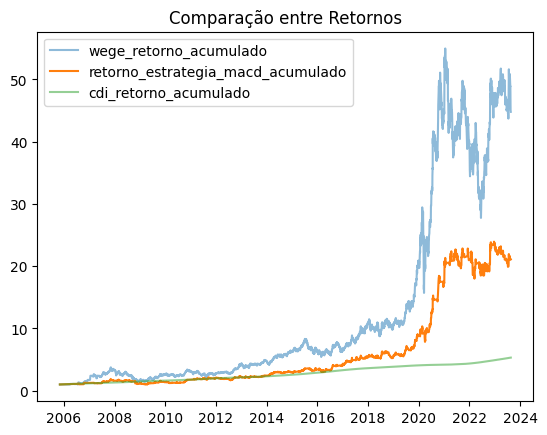

In [74]:
plt.plot(df.index, (df["retornos"]+1).cumprod(), alpha=0.5, label="wege_retorno_acumulado")
plt.plot(df.index, (df["retornos estratégia"]+1).cumprod(), label="retorno_estrategia_macd_acumulado")
plt.plot(df.index, (df["cdi"]+1).cumprod(), alpha=0.5, label="cdi_retorno_acumulado")
plt.title("Comparação entre Retornos")
plt.legend()

In [75]:
df

,Open,High,Low,Close,Adj Close,Volume,cdi,ema20,ema50,fastsignal,slowsignal,hist,macdsignal,data,retornos,retornos estratégia
Date,,,,,,,,,,,,,,,,
2005-11-03,1.109467,1.109467,1.109467,1.109467,0.804701,0,0.000688,0.804701,0.804701,0.000000,0.000000,0.000000,0,2005-11-03,0.000000,0.000688
2005-11-04,1.109467,1.109467,1.109467,1.109467,0.804701,0,0.000689,0.804701,0.804701,0.000000,0.000000,0.000000,0,2005-11-04,0.000000,0.000689
2005-11-07,1.109467,1.109467,1.109467,1.109467,0.804701,0,0.000689,0.804701,0.804701,0.000000,0.000000,0.000000,0,2005-11-07,0.000000,0.000689
2005-11-08,1.109467,1.109467,1.109467,1.109467,0.804701,0,0.000689,0.804701,0.804701,0.000000,0.000000,0.000000,0,2005-11-08,0.000000,0.000689
2005-11-09,1.109467,1.109467,1.109467,1.109467,0.804701,0,0.000689,0.804701,0.804701,0.000000,0.000000,0.000000,0,2005-11-09,0.000000,0.000689
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-08-15,39.220001,39.779999,39.160000,39.349998,39.349998,3892600,0.000490,39.574960,38.821438,0.552498,0.738870,-0.186372,0,2023-08-15,0.001017,0.000490
2023-08-16,39.320000,39.320000,37.439999,37.610001,37.610001,12275400,0.000490,39.387821,38.773931,0.329951,0.657086,-0.327135,0,2023-08-16,-0.044218,0.000490
2023-08-17,37.990002,37.990002,36.520000,36.910000,36.910000,8420400,0.000490,39.151838,38.700835,0.095990,0.544867,-0.448877,0,2023-08-17,-0.018612,0.000490


In [76]:
k, d = tb.STOCHRSI(df["Close"], timeperiod=14, fastk_period=5, fastd_period=3, fastd_matype=0)
k = pd.DataFrame(k)
d = pd.DataFrame(d)


In [77]:
df["k"] = k.values
df["d"] = d.values

In [78]:
df = df.dropna()

In [79]:
number_of_orders = 0
sinal_rsi_est = list([])
for i in range(len(df)):
    if (number_of_orders != 1)&(df["k"].iloc[i] < 20)&(df["d"].iloc[i] < 20):
        sinal_rsi_est.append(1)
        number_of_orders = 1
        print(1)
    elif (number_of_orders != 0)&(df["k"].iloc[i] > 80)&(df["d"].iloc[i] > 80):
        sinal_rsi_est.append(2)
        number_of_orders = 0
        print(2)
    else:
        sinal_rsi_est.append(0)  
        print(0)  

sinal_rsi_est = pd.DataFrame(sinal_rsi_est)
sinal_rsi_est.value_counts()

1
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
2
0
0
0
1
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
2
0
0
0
0
1
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
2
0
0
0
1
0
0
0
0
0
0
2
0
0
1
0
0
2
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
1
0
0
2
0
0
0
0
0
1
0
0
0
0
0
0
0
0
0
2
0
0
0
0
0
1
0
0
0
0
2
0
0
0
0
0
0
0
1
0
0
0
0
0
0
0
0
0
0
0
2
0
0
0
0
0
0
0
0
0
0
1
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
2
0
0
0
0
0
1
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
2
0
0
0
1
0
0
0
0
0
2
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
1
0
0
0
0
0
0
0
0
0
2
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
1
0
0
0
0
0
2
0
0
0
1
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
2
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
1
0
0
0
0
0
0
0
0
0
0
0
2
0
0
0
0
0


0    4012
1     189
2     188
dtype: int64

In [80]:
df["rsisignal"] = sinal_rsi_est.values

C:\Users\User\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [81]:
df["data"] = df.index

C:\Users\User\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


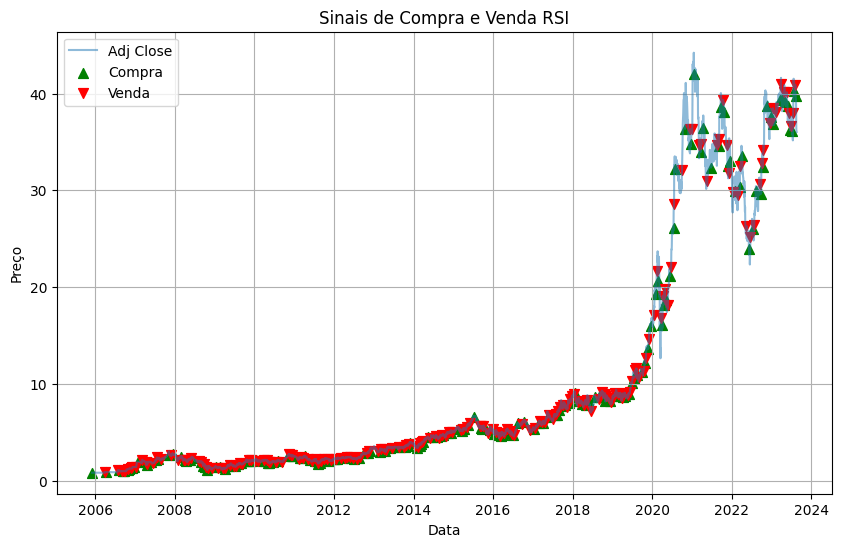

In [82]:
plt.figure(figsize=(10, 6))
plt.plot(df["data"], df['Adj Close'], label='Adj Close', alpha=0.5)

# Adicionar pontos de compra e venda ao gráfico
compra_indices = df[df['rsisignal'] == 1].index
venda_indices = df[df['rsisignal'] == 2].index

plt.scatter(df["data"].loc[compra_indices], df['Adj Close'].loc[compra_indices], color='green', label='Compra', marker='^', s=50)
plt.scatter(df["data"].loc[venda_indices], df['Adj Close'].loc[venda_indices], color='red', label='Venda', marker='v', s=50)

# Adicionar legenda e rótulos dos eixos
plt.legend()
plt.xlabel('Data')
plt.ylabel('Preço')
plt.title('Sinais de Compra e Venda RSI')
plt.grid()

# Exibir o gráfico
plt.show()


In [83]:
df[df["rsisignal"] == 1]["Adj Close"]
df[df["rsisignal"] == 2]["Adj Close"]
comprarsi = np.array(df[df["rsisignal"] == 1]["Adj Close"])
vendarsi = np.array(df[df["rsisignal"] == 2]["Adj Close"])

In [84]:
df[df["rsisignal"] == 1]["Adj Close"].index


DatetimeIndex(['2005-12-02', '2006-04-06', '2006-08-02', '2006-09-11',
               '2006-09-25', '2006-10-23', '2006-11-06', '2006-11-29',
               '2006-12-18', '2007-01-23',
               ...
               '2022-12-27', '2023-01-20', '2023-03-22', '2023-04-04',
               '2023-05-04', '2023-05-29', '2023-06-22', '2023-07-10',
               '2023-07-28', '2023-08-11'],
              dtype='datetime64[ns]', name='Date', length=189, freq=None)

In [85]:
df[df["rsisignal"] == 2]["Adj Close"].index


DatetimeIndex(['2006-03-31', '2006-07-26', '2006-09-04', '2006-09-20',
               '2006-09-28', '2006-10-26', '2006-11-21', '2006-12-06',
               '2007-01-08', '2007-03-06',
               ...
               '2022-12-16', '2023-01-13', '2023-02-13', '2023-03-27',
               '2023-04-24', '2023-05-22', '2023-06-07', '2023-06-29',
               '2023-07-20', '2023-08-07'],
              dtype='datetime64[ns]', name='Date', length=188, freq=None)

In [86]:
retorno_estrategia_rsi = vendarsi/comprarsi[:-1]
retorno_estrategia_rsi_acumulado = retorno_estrategia_rsi.cumprod()
len(retorno_estrategia_rsi_acumulado)

188

In [87]:
ind = df[df["rsisignal"] == 2]["Adj Close"].index
retorno_estrategia_rsi_acumulado = pd.DataFrame(retorno_estrategia_rsi_acumulado)
retorno_estrategia_rsi_acumulado.index = ind

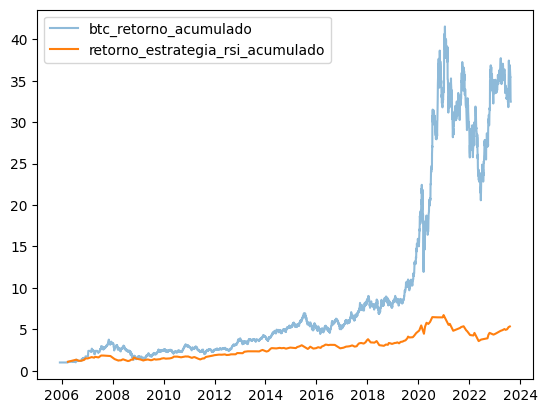

In [88]:
plt.plot(df.index, (df["Close"].pct_change()+1).cumprod(), alpha=0.5, label="btc_retorno_acumulado")
plt.plot(retorno_estrategia_rsi_acumulado.index,retorno_estrategia_rsi_acumulado, label="retorno_estrategia_rsi_acumulado")
plt.legend()

In [89]:
df["Value"] = (df["Value"]/100).values

KeyError: 'Value'

In [ ]:
df["Value"].iloc[0] = 1

c:\Python37\lib\site-packages\pandas\core\indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


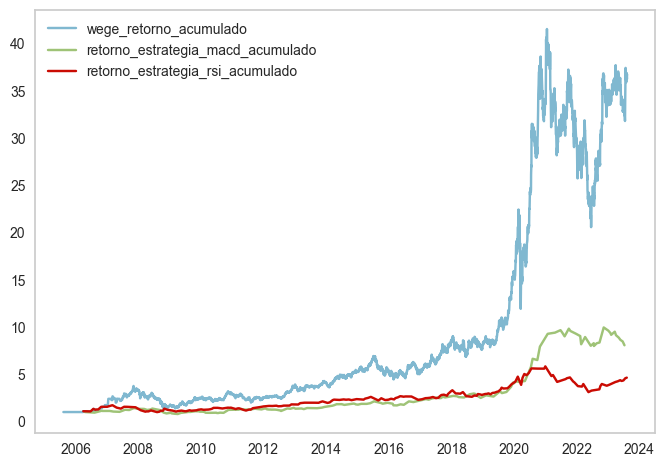

In [ ]:
plt.plot(df.index, (df["Close"].pct_change()+1).cumprod(), alpha=0.5, label="wege_retorno_acumulado")
plt.plot(retorno_estrategia_macd_acumulado.index,retorno_estrategia_macd_acumulado, label="retorno_estrategia_macd_acumulado")
plt.plot(retorno_estrategia_rsi_acumulado.index,retorno_estrategia_rsi_acumulado, label="retorno_estrategia_rsi_acumulado")
plt.grid()
#plt.plot(df.index, df["Value"].cumsum(), label="CDI")
plt.legend()

In [ ]:
vetor = list([])
for i in range(len(df)-1):
    if (i == len(df)):
        vetor.append(0)
    elif (df["Adj Close"].iloc[i+1]  <  df["Adj Close"].iloc[i]):
        vetor.append(0)
    elif (df["Adj Close"].iloc[i+1]  >  df["Adj Close"].iloc[i]): 
        vetor.append(1)
    else:
        vetor.append(0)    
    

In [ ]:
len(vetor)

4475

In [ ]:
df_aux = df

In [ ]:
df = df.drop(df.index[-1])


In [ ]:
df["signal"] = vetor

In [ ]:
df = df.dropna()

In [ ]:
df['emasignal'] = np.where(df['ema20'] > df['ema50'], 1, -1)


In [ ]:
df["emasignal"] = df["emasignal"].shift(1)

In [ ]:
from sklearn.model_selection import train_test_split

Y = df["signal"]
X = df.loc[:, (df.columns != "signal")&(df.columns != "data")&(df.columns != "rsisignal")&(df.columns != "macdsignal")&(df.columns != "emasignal")&(df.columns != "Volume")&(df.columns != "k")&(df.columns != "Close")&(df.columns != "Low")]

X = pd.DataFrame(X)
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.3)

In [ ]:
from sklearn.linear_model import LogisticRegression

logmodel = LogisticRegression(max_iter=10000)
logmodel.fit(x_train,y_train)

LogisticRegression(max_iter=10000)

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [ ]:
x_train

,Open,High,Low,Close,Adj Close,Volume,fastsignal,slowsignal,hist,k,d
Date,,,,,,,,,,,
2017-02-13,6.288461,6.350000,6.253846,6.323076,5.711625,3232320,0.099663,0.083896,0.015767,1.000000e+02,1.000000e+02
2020-09-23,32.419998,32.915001,31.250000,31.250000,29.948391,9798000,-0.291535,-0.198681,-0.092854,2.995859e+01,7.224684e+01
2015-08-20,6.765384,6.884615,6.346153,6.396153,5.593299,4049500,-0.199722,-0.132783,-0.066939,0.000000e+00,6.533343e+01
2008-10-10,1.715976,1.715976,1.715976,1.715976,1.266010,0,-0.172920,-0.131642,-0.041278,8.186459e-14,2.255124e-14
2012-03-20,2.939349,2.967455,2.886094,2.903846,2.335645,1114048,0.023185,0.019568,0.003617,0.000000e+00,1.658552e+01
...,...,...,...,...,...,...,...,...,...,...,...
2021-10-28,38.990002,39.119999,37.520000,37.830002,36.675354,8346500,0.085541,0.290711,-0.205170,0.000000e+00,3.114017e+01
2017-07-10,6.930769,7.111538,6.930769,7.084615,6.470724,6056700,-0.047070,-0.074536,0.027467,1.000000e+02,6.341680e+01
2015-08-21,6.442307,6.576923,6.226923,6.484615,5.670656,4107740,-0.212243,-0.148675,-0.063568,5.457174e+01,5.059647e+01


In [ ]:
X_train_scaled = scaler.fit_transform(x_train)
X_test_scaled = scaler.transform(x_test)


In [ ]:
df_train_scaled = pd.DataFrame(X_train_scaled, columns=X.columns)
df_test_scaled = pd.DataFrame(X_test_scaled, columns=X.columns)


In [ ]:
df_train_scaled

,Open,High,Low,Close,Adj Close,Volume,fastsignal,slowsignal,hist,k,d
0,-0.340749,-0.343556,-0.335853,-0.337593,-0.333884,-0.307907,0.103082,0.064057,0.133726,1.238706,1.562574
1,1.832550,1.830535,1.778530,1.737859,1.701674,1.099646,-0.848353,-0.665975,-0.692097,-0.417929,0.733815
2,-0.301084,-0.299803,-0.328045,-0.331509,-0.343822,-0.132720,-0.625053,-0.495727,-0.495071,-1.126516,0.527369
3,-0.721032,-0.722807,-0.719704,-0.721187,-0.707255,-1.000853,-0.559869,-0.492780,-0.299978,-1.126516,-1.423602
4,-0.619287,-0.620385,-0.620726,-0.622283,-0.617420,-0.762023,-0.082922,-0.102134,0.041352,-1.126516,-0.928329
...,...,...,...,...,...,...,...,...,...,...,...
3089,2.378961,2.338355,2.308899,2.285720,2.266647,0.788473,0.068735,0.598356,-1.546014,-1.126516,-0.493702
3090,-0.287330,-0.281232,-0.278594,-0.274186,-0.270130,0.297585,-0.253787,-0.345250,0.222680,1.238706,0.470135
3091,-0.327954,-0.324985,-0.338131,-0.324143,-0.337325,-0.120234,-0.655507,-0.536784,-0.469445,0.164227,0.087297
3092,-0.575734,-0.578254,-0.572551,-0.574618,-0.575157,-0.652028,-0.067779,-0.056396,-0.045914,-0.741186,-1.240398


In [ ]:
predictionslogtest = logmodel.predict(x_test)

In [ ]:
predictionslogtrain = logmodel.predict(x_train)


In [ ]:
from sklearn.metrics import classification_report

In [ ]:
print(classification_report(y_test,predictionslogtest))

              precision    recall  f1-score   support

           0       0.53      0.91      0.67       695
           1       0.53      0.11      0.18       633

    accuracy                           0.53      1328
   macro avg       0.53      0.51      0.43      1328
weighted avg       0.53      0.53      0.44      1328



In [ ]:
from yellowbrick.classifier import ConfusionMatrix, ROCAUC

c:\Python37\lib\site-packages\yellowbrick\classifier\base.py:234: YellowbrickWarning: could not determine class_counts_ from previously fitted classifier
  YellowbrickWarning,


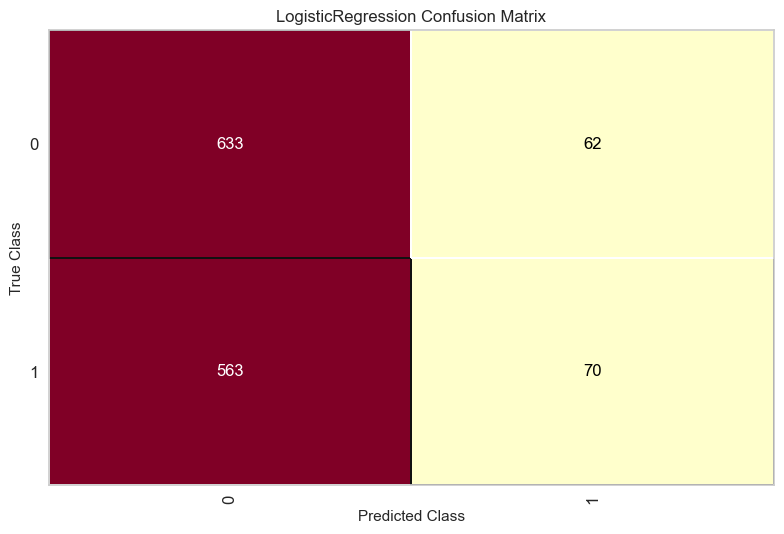

<AxesSubplot:title={'center':'LogisticRegression Confusion Matrix'}, xlabel='Predicted Class', ylabel='True Class'>

In [ ]:
cm_viz = ConfusionMatrix(logmodel)
cm_viz.score(x_test, y_test)
cm_viz.show()

In [ ]:

from yellowbrick.model_selection import FeatureImportances

In [ ]:
    viz = FeatureImportances(logmodel)

c:\Python37\lib\site-packages\sklearn\base.py:451: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  "X does not have valid feature names, but"
c:\Python37\lib\site-packages\yellowbrick\model_selection\importances.py:199: YellowbrickWarning: detected multi-dimensional feature importances but stack=False, using mean to aggregate them.
  YellowbrickWarning,


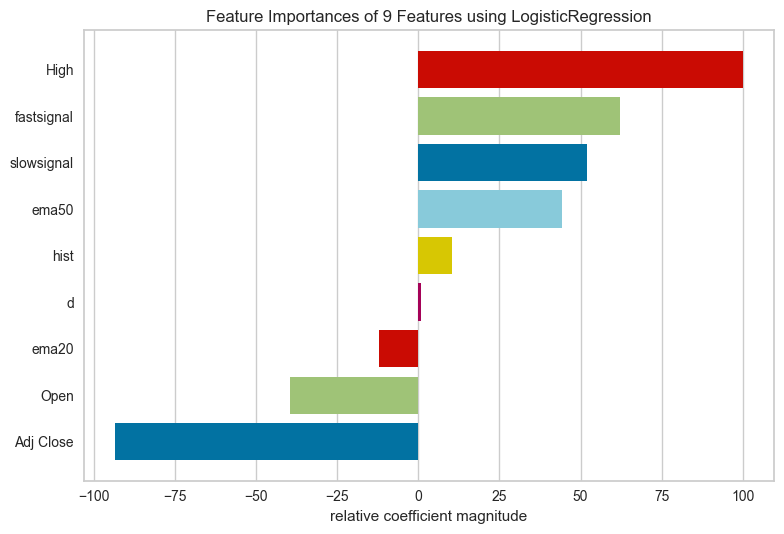

<AxesSubplot:title={'center':'Feature Importances of 9 Features using LogisticRegression'}, xlabel='relative coefficient magnitude'>

In [ ]:
fig, ax = plt.subplots()
viz = FeatureImportances(logmodel, relative=True) 
viz.fit(x_train, y_train)
viz.poof()


NAYVE BAYES GAUSSIANO

In [ ]:
from sklearn.naive_bayes import GaussianNB


In [ ]:
nb = GaussianNB()

In [ ]:
nb.fit(x_train,y_train)

GaussianNB()

In [ ]:
nb.score(x_test,y_test)

0.5353915662650602

In [ ]:
predictionsnbtest = nb.predict(x_test)

In [ ]:
predictionsnbtrain = nb.predict(x_train)

In [ ]:
print(classification_report(y_test,predictionsnbtest))


              precision    recall  f1-score   support

           0       0.53      0.86      0.66       695
           1       0.54      0.17      0.26       633

    accuracy                           0.54      1328
   macro avg       0.54      0.52      0.46      1328
weighted avg       0.54      0.54      0.47      1328



NAYVE BAYES DISCRECTO

In [ ]:
from sklearn.naive_bayes import BernoulliNB


In [ ]:
nbb = BernoulliNB()

In [ ]:
from sklearn.model_selection import train_test_split

Y = df["signal"]
X = df[["rsisignal","macdsignal","emasignal"]]

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.3)

In [ ]:
nbb.fit(x_train, y_train)

BernoulliNB()

In [ ]:
predictionsnbtest = nbb.predict(x_test)

In [ ]:
predictionnbtrain = nbb.predict(x_train)

In [ ]:
print(classification_report(y_test,predictionsnbtest))


              precision    recall  f1-score   support

           0       0.54      0.62      0.57       708
           1       0.47      0.39      0.43       620

    accuracy                           0.51      1328
   macro avg       0.50      0.50      0.50      1328
weighted avg       0.51      0.51      0.50      1328



KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier


In [ ]:
knn = KNeighborsClassifier()
knn.fit(x_train,y_train)

KNeighborsClassifier()

In [ ]:
predictknntest = knn.predict(x_test)

In [ ]:
predictknntrain = knn.predict(x_train)

In [ ]:
print(classification_report(y_test,predictknntest))

              precision    recall  f1-score   support

           0       0.56      0.59      0.58       695
           1       0.53      0.49      0.51       633

    accuracy                           0.55      1328
   macro avg       0.54      0.54      0.54      1328
weighted avg       0.55      0.55      0.55      1328



DECISIONTREECLASSIFIER

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
dt = DecisionTreeClassifier()

In [ ]:
dt.fit(x_train, y_train)

DecisionTreeClassifier()

In [ ]:
predictdttest = dt.predict(x_test)

In [ ]:
predictdttrain = dt.predict(x_train)


In [ ]:
viz = FeatureImportances(dt)


c:\Python37\lib\site-packages\sklearn\base.py:451: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  "X does not have valid feature names, but"


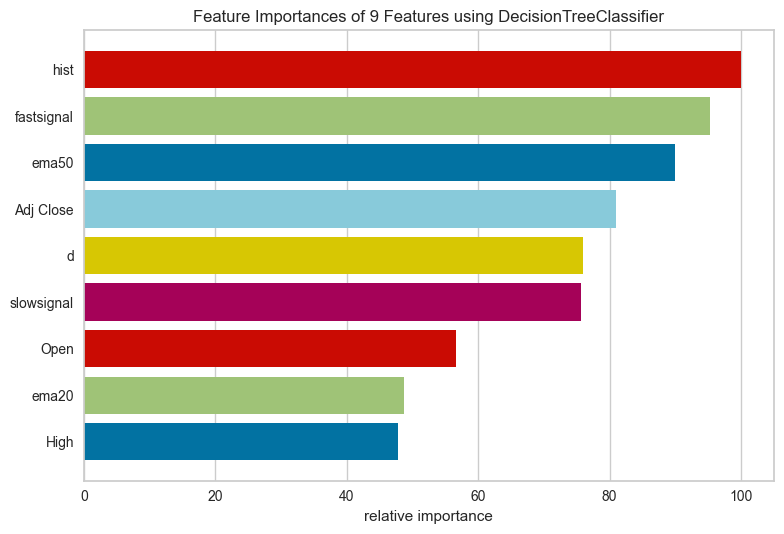

<AxesSubplot:title={'center':'Feature Importances of 9 Features using DecisionTreeClassifier'}, xlabel='relative importance'>

In [ ]:
fig, ax = plt.subplots()
viz = FeatureImportances(dt, relative=True) 
viz.fit(x_train, y_train)
viz.poof()

In [ ]:
from yellowbrick.classifier import ConfusionMatrix, ROCAUC


c:\Python37\lib\site-packages\yellowbrick\classifier\base.py:234: YellowbrickWarning: could not determine class_counts_ from previously fitted classifier
  YellowbrickWarning,


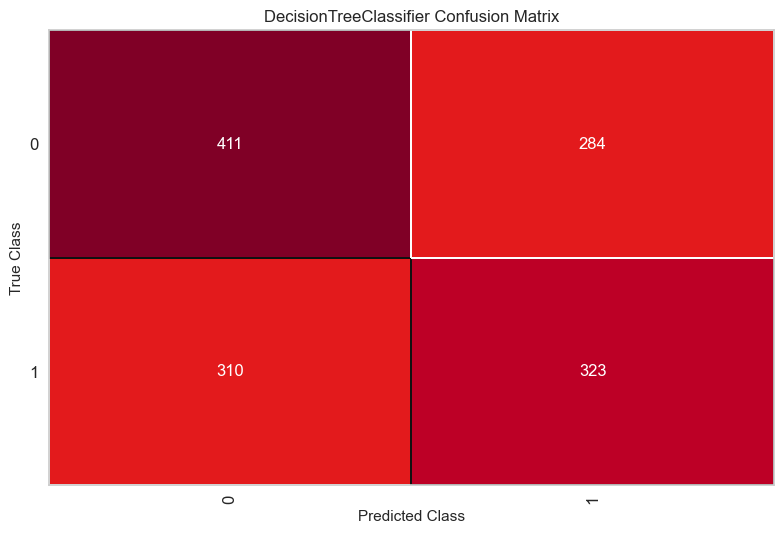

<AxesSubplot:title={'center':'DecisionTreeClassifier Confusion Matrix'}, xlabel='Predicted Class', ylabel='True Class'>

In [ ]:
cm_viz = ConfusionMatrix(dt)
cm_viz.score(x_test, y_test)
cm_viz.show()

In [ ]:
print(classification_report(y_test,predictdttest))


              precision    recall  f1-score   support

           0       0.57      0.59      0.58       695
           1       0.53      0.51      0.52       633

    accuracy                           0.55      1328
   macro avg       0.55      0.55      0.55      1328
weighted avg       0.55      0.55      0.55      1328



In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
rf = RandomForestClassifier()

In [ ]:
rf.fit(x_train,y_train)

RandomForestClassifier()

In [ ]:
predictrftest = rf.predict(x_test)

In [ ]:
predictrftrain = rf.predict(x_train)


In [ ]:
print(classification_report(y_test, predictrftest))

              precision    recall  f1-score   support

           0       0.57      0.62      0.59       695
           1       0.53      0.48      0.50       633

    accuracy                           0.55      1328
   macro avg       0.55      0.55      0.55      1328
weighted avg       0.55      0.55      0.55      1328



In [ ]:
viz = FeatureImportances(rf)


c:\Python37\lib\site-packages\sklearn\base.py:451: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  "X does not have valid feature names, but"


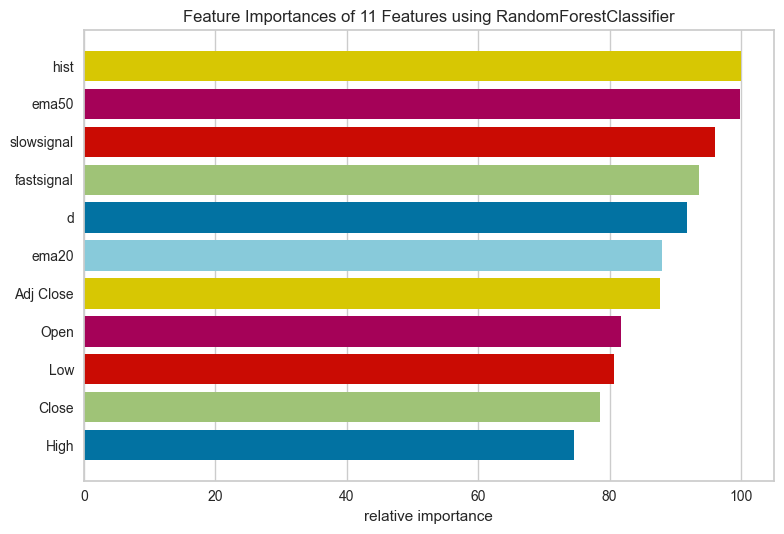

<AxesSubplot:title={'center':'Feature Importances of 11 Features using RandomForestClassifier'}, xlabel='relative importance'>

In [ ]:
fig, ax = plt.subplots()
viz = FeatureImportances(rf, relative=True) 
viz.fit(x_train, y_train)
viz.poof()

In [ ]:
from yellowbrick.classifier import ConfusionMatrix, ROCAUC


c:\Python37\lib\site-packages\yellowbrick\classifier\base.py:234: YellowbrickWarning: could not determine class_counts_ from previously fitted classifier
  YellowbrickWarning,


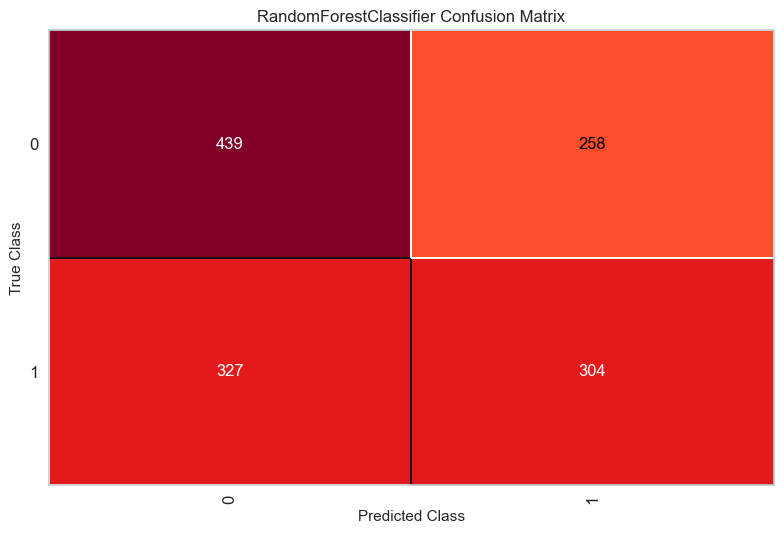

<AxesSubplot:title={'center':'RandomForestClassifier Confusion Matrix'}, xlabel='Predicted Class', ylabel='True Class'>

In [ ]:
cm_viz = ConfusionMatrix(rf)
cm_viz.score(x_test, y_test)
cm_viz.show()

In [ ]:
backtest = rf.predict(X)

In [ ]:
len(backtest)

4426

In [ ]:
df["BT"] = backtest

In [ ]:
df["BT"].value_counts()

0    2446
1    1980
Name: BT, dtype: int64

In [ ]:
df["PCT"] = df['Close'].pct_change()

In [ ]:
df["ret ML"] = df["PCT"]*df["BT"]

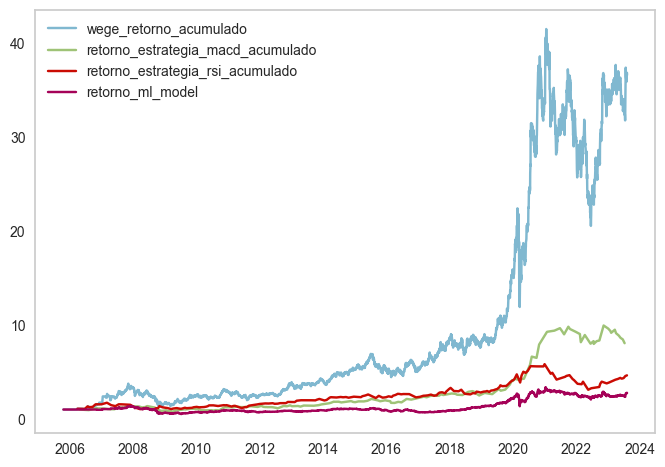

In [ ]:
plt.plot(df.index, (df["Close"].pct_change()+1).cumprod(), alpha=0.5, label="wege_retorno_acumulado")
plt.plot(retorno_estrategia_macd_acumulado.index,retorno_estrategia_macd_acumulado, label="retorno_estrategia_macd_acumulado")
plt.plot(retorno_estrategia_rsi_acumulado.index,retorno_estrategia_rsi_acumulado, label="retorno_estrategia_rsi_acumulado")
plt.plot(df["data"], (df["ret ML"]+1).cumprod(),label="retorno_ml_model" )
plt.grid()
#plt.plot(df.index, df["Value"].cumsum(), label="CDI")
plt.legend()

XGBOOST

In [ ]:
import xgboost

In [ ]:
xgb = xgboost.XGBClassifier()

In [ ]:
xgb.fit(x_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)

In [ ]:
predictxbgtest = xgb.predict(x_test)

In [ ]:
predictxgbtrain = xgb.predict(x_train)

In [ ]:

print(classification_report( y_test,predictxbgtest))

              precision    recall  f1-score   support

           0       0.55      0.58      0.57       695
           1       0.51      0.48      0.50       633

    accuracy                           0.53      1328
   macro avg       0.53      0.53      0.53      1328
weighted avg       0.53      0.53      0.53      1328



In [ ]:
from xgboost import plot_tree

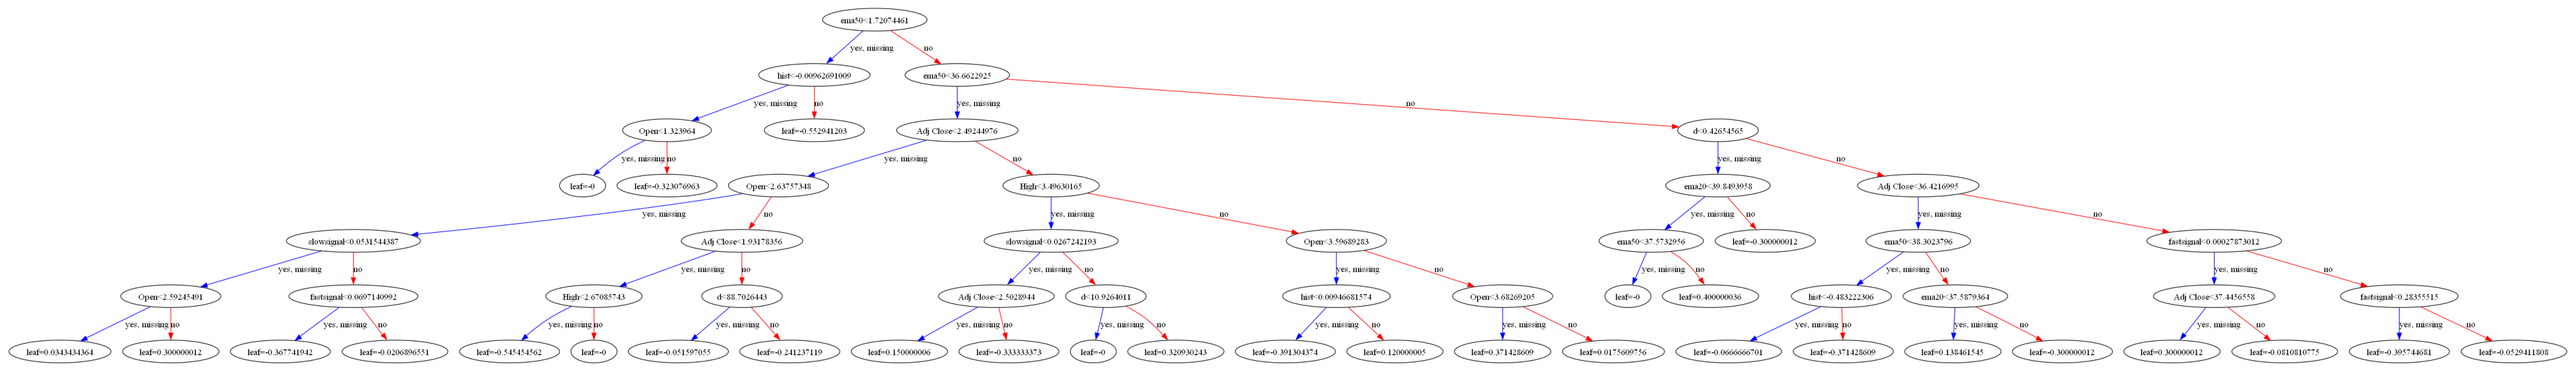

In [ ]:
fig, ax = plt.subplots(figsize=(40,40))
plot_tree(xgb, ax= ax, num_trees=0)
plt.tight_layout()
plt.show()

REDE NEURAL

In [ ]:
from sklearn.neural_network import MLPClassifier

In [ ]:
rn = MLPClassifier()

In [ ]:
rn.fit(x_train,y_train)

MLPClassifier()

In [ ]:
predictionsrntrain = rn.predict(x_train)

In [ ]:
predictionsrntest = rn.predict(x_test)


In [ ]:
print(classification_report(y_test, predictionsrntest))

              precision    recall  f1-score   support

           0       0.54      0.69      0.61       695
           1       0.52      0.36      0.43       633

    accuracy                           0.54      1328
   macro avg       0.53      0.53      0.52      1328
weighted avg       0.53      0.54      0.52      1328



STACKING 

In [ ]:
train_stack = np.column_stack((predictxgbtrain,predictdttrain,predictknntrain,predictrftrain,predictionsrntrain,predictionslogtrain,predictionsnbtrain))


In [ ]:
train_stack

array([[0, 0, 0, 0, 0],
       [1, 1, 1, 1, 0],
       [1, 1, 1, 0, 0],
       ...,
       [0, 0, 0, 0, 0],
       [0, 0, 0, 1, 0],
       [0, 0, 0, 1, 1]], dtype=int64)

In [ ]:
test_stack = np.column_stack((predictxbgtest,predictdttest,predictknntest,predictrftest,predictionsrntest,predictionslogtest,predictionsnbtest))


In [ ]:
from sklearn.linear_model import LogisticRegression



In [ ]:
final_model = LogisticRegression()


In [ ]:
final_model.fit(train_stack, y_train)

LogisticRegression()

In [ ]:
pred = final_model.predict(test_stack)

In [ ]:
print(classification_report(pred, y_test))

              precision    recall  f1-score   support

           0       0.60      0.56      0.58       743
           1       0.48      0.52      0.50       585

    accuracy                           0.54      1328
   macro avg       0.54      0.54      0.54      1328
weighted avg       0.54      0.54      0.54      1328



In [ ]:
viz = FeatureImportances(final_model)

c:\Python37\lib\site-packages\yellowbrick\model_selection\importances.py:199: YellowbrickWarning: detected multi-dimensional feature importances but stack=False, using mean to aggregate them.
  YellowbrickWarning,


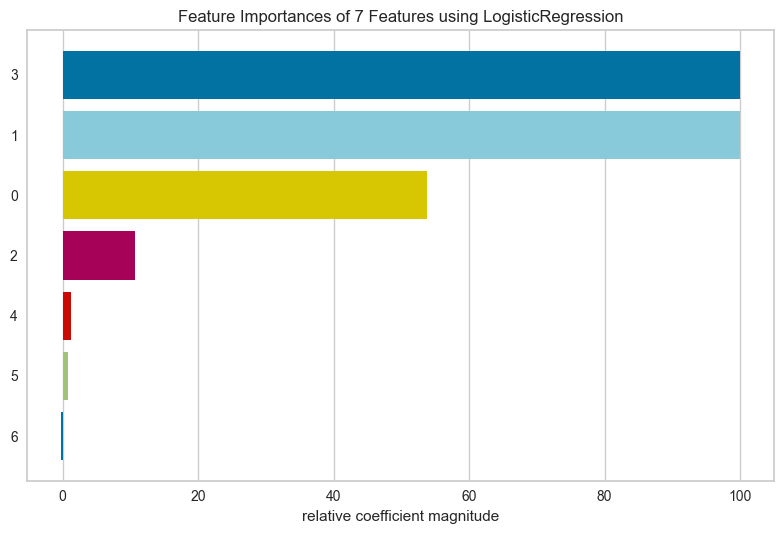

<AxesSubplot:title={'center':'Feature Importances of 7 Features using LogisticRegression'}, xlabel='relative coefficient magnitude'>

In [ ]:
fig, ax = plt.subplots()
viz = FeatureImportances(final_model, relative=True) 
viz.fit(train_stack, y_train)
viz.poof()

In [ ]:
import xgboost

In [ ]:
final_model = xgboost.XGBClassifier()

In [ ]:
final_model.fit(train_stack,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)

In [ ]:
p = final_model.predict(test_stack)

In [ ]:
print(classification_report(y_test,p))

              precision    recall  f1-score   support

           0       0.58      0.56      0.57       720
           1       0.50      0.51      0.50       608

    accuracy                           0.54      1328
   macro avg       0.54      0.54      0.54      1328
weighted avg       0.54      0.54      0.54      1328

